In [62]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob

path = os.getcwd() 

In [26]:
files = glob.glob(path + "/data/Appeals/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

print "DONE CONCATINATING DATA"

DONE CONCATINATING DATA


##### number of appeals 2003-2015 and number of features

In [27]:
df.shape

(2608960, 24)

###### get 2015 year only, too

In [36]:
df15 = pd.read_csv(path + "appeals15.csv",index_col=None, header=0)

(370183, 23)

In [41]:
def print_statistics(data):
    '''
    Given a pandas dataframe, print dataframe statistics, correlation, and missing data.
    '''
    pd.set_option('display.width', 20)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print '**** column names:  ', "\n", data.columns.values
    #print '**** top of the data: ', "\n",  data.head()
    #print '**** dataframe shape: ', "\n", data.shape
    print '**** statistics: ', "\n", data.describe(include='all')
    #print '**** MODE: ', "\n", data.mode()
    print '**** sum of null values by column: ', "\n", data.isnull().sum()
    print '**** correlation matrix: ', "\n", data.corr()

print_statistics(df)

1


#### Appeals per year

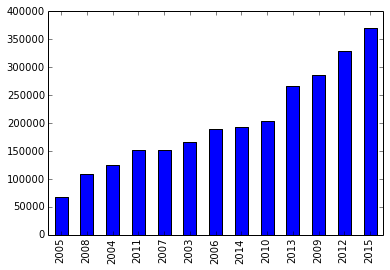

In [63]:
pd.value_counts(df["taxyear"], ascending=True).plot(kind = "bar")
plt.savefig(path + "/results/appeals-per-year.png")

In [47]:
print pd.value_counts(df["taxyear"])

2015    370183
2012    329005
2009    286505
2013    266278
2010    203698
2014    192981
2006    188727
2003    166562
2007    152477
2011    151169
2004    125317
2008    109387
2005     66671
dtype: int64


Axes(0.125,0.125;0.775x0.775)


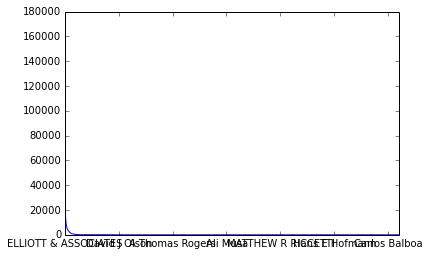

In [72]:
print pd.value_counts(df["attorneytaxrep"]).plot()

In [71]:
df.head()

,appealnum,area,ass_win,assr_final,assr_rev,attorneytaxrep,board_av,bor_rev,bor_win,city_name,...,pin,prioir_av,proppose_av,street_name,street_suffix,subarea,taxyear,total_rev,win,zip
0,164,1,0,59618,0,"KEARNEY & PHELAN, LTD.",48260,11358,1,BARRINGTON,...,1011010200000,59618,59618,HOUGH,ST,101,2003,11358,1,600104319
1,142,1,0,114882,0,RIEFF & SCHRAMM,114882,0,0,BARRINGTON,...,1011020010000,114882,114882,COOK,ST,101,2003,0,0,600104311
2,142,1,0,124517,0,RIEFF & SCHRAMM,124517,0,0,BARRINGTON,...,1011020050000,124517,124517,PARK,AVE,101,2003,0,0,600104332
3,145,1,1,563336,308144,EUGENE L. GRIFFIN & ASSOCIATES,492097,71239,1,BARRINGTON,...,1011030020000,492099,871480,MAIN,ST,101,2003,379383,1,600104205
4,26,1,1,386419,222621,"MCCRACKEN,WALSH,DELAVEN & HETLER",386419,0,0,BARRINGTON,...,1011030030000,321977,609040,MAIN,ST,101,2003,222621,1,600104225


### plot covariates to use for logistic regression / SVM
### ML if person won or not - logistic regression
#### what are the variables describin the passes? ass_win?
### compare prior av to propose av

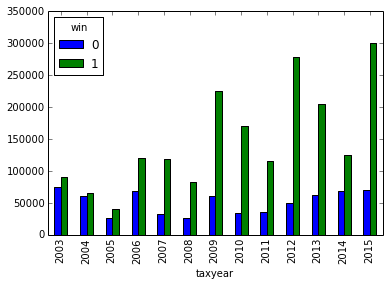

In [98]:
#print pd.value_counts(df["win"]).groupby("taxyear")
#df["city_name"].groupby("win")
#df.groupby(['taxyear']).mean()
df.groupby(['taxyear','win']).size().unstack().plot(kind = "bar")
plt.savefig(path + "/results/appeals-wins-by-year.png")